# Fingerprint segmentation module

In [1]:
import numpy as np
import cv2 as cv
import tensorflow as tf
from utils import show
from ipywidgets import interact
import time
from IPython.display import clear_output
import json

# TODO ???
import os, sys
current = os.path.dirname(os.path.realpath("."))
sys.path.append(current)

import pyfing as pf

2023-10-09 11:39:20.907331: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-09 11:39:20.907415: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-09 11:39:20.907451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 11:39:20.917910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Paths
PATH_FVC = '../../datasets/'
PATH_PARAMS = '../parameters/segmentation/'
PATH_GT = '../../datasets/segmentationbenchmark/groundtruth/'
PATH_TESTS = '../../results/'

## 1. Basic examples

Example: fingerprint segmentation using the default parameters.

,,
,,

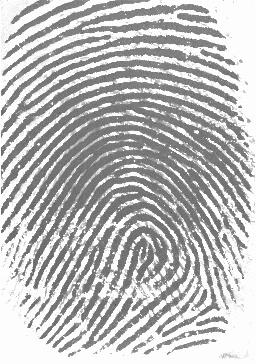
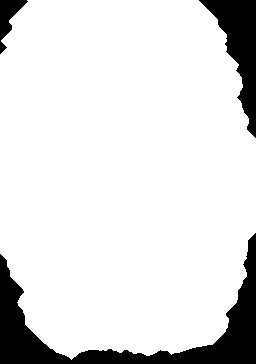
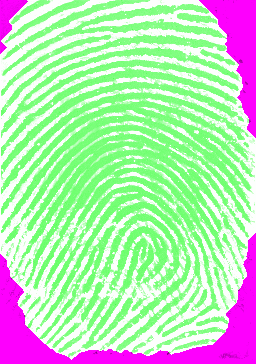

In [3]:
fingerprint = cv.imread(PATH_FVC + 'fvc2000/db2_b/101_1.png', cv.IMREAD_GRAYSCALE)
seg = pf.GradMagSegmentationAlgorithm()
#seg = pf.DnnSegmentationAlgorithm(tf.keras.models.load_model('../models/segmentation512x512.keras'))
mask = seg.run(fingerprint)
show(fingerprint, mask, cv.merge((fingerprint, mask, fingerprint)))

Example: segmentation with parameters loaded from file.

,,
,,

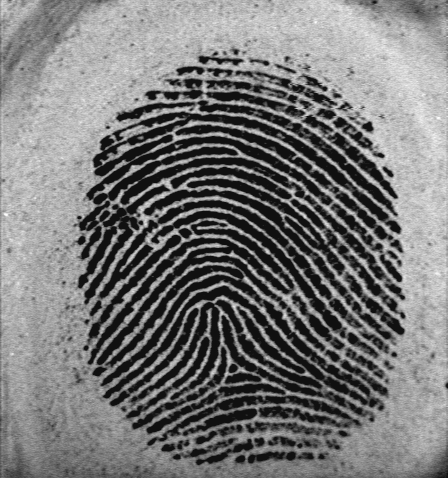
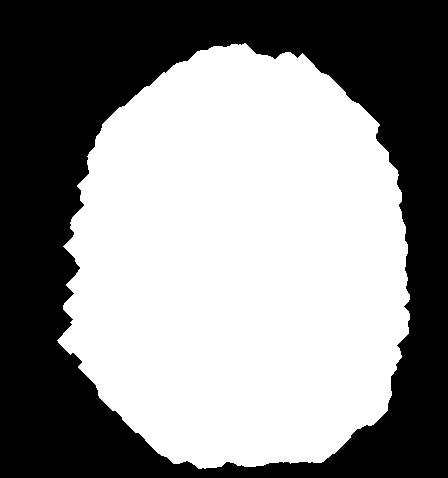
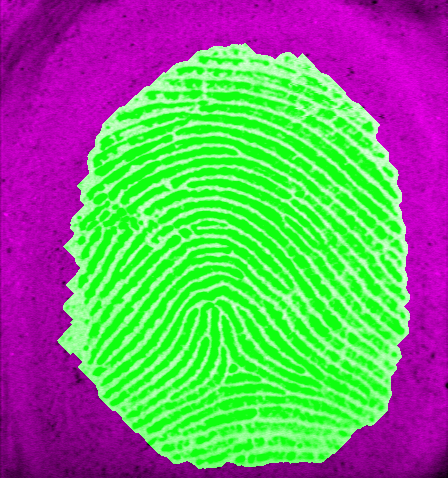

In [4]:
#seg.parameters = segmentation.GradMagSegmentationParameters.load(PATH_PARAMS + 'fvc2000_db3_b_best_params.txt')
fingerprint = cv.imread(PATH_FVC + 'fvc2000/db3_b/101_1.png', cv.IMREAD_GRAYSCALE)
mask = seg.run(fingerprint)
show(fingerprint, mask, cv.merge((fingerprint, mask, fingerprint)))

Showing intermediate steps of the segmentation algorithm:

,Gradient magnitude,Sum over the window,Thresholding,After closing,Largest component,After fill holes,After opening,
,,,,,,,,

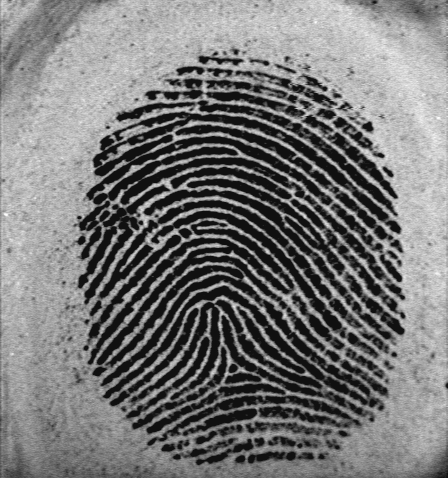
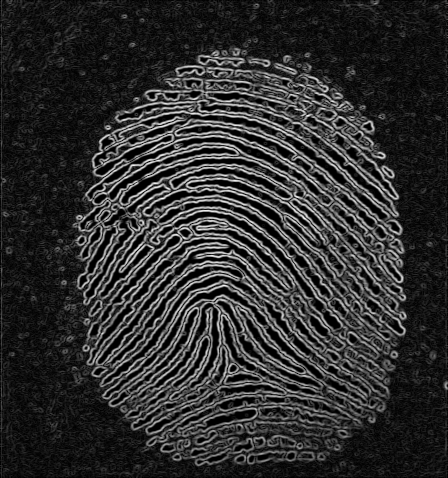
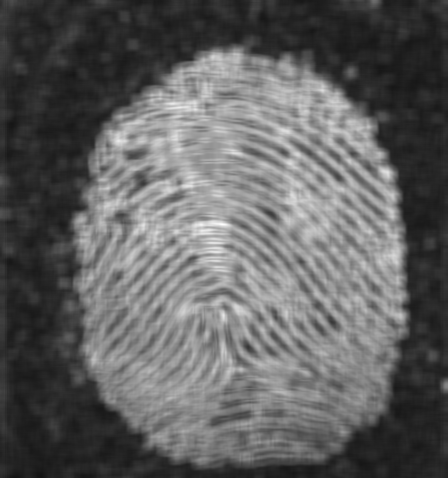
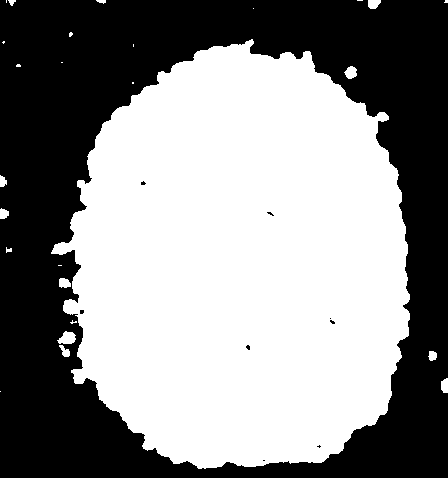
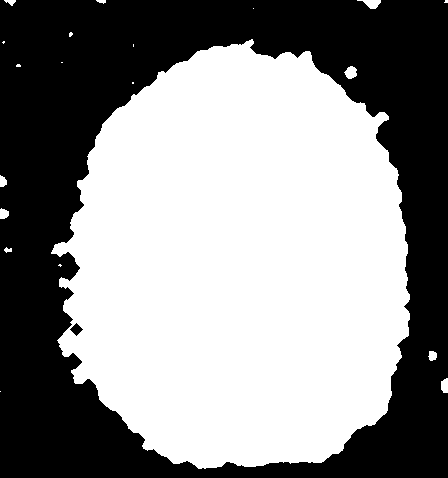
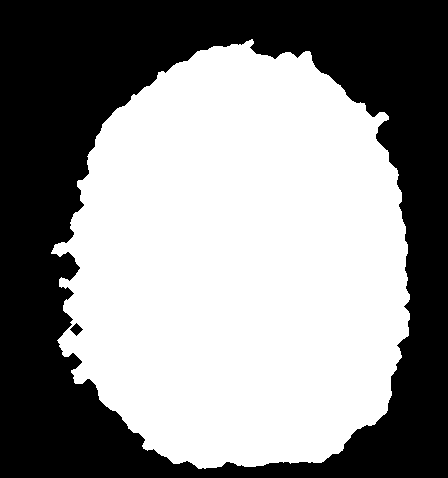
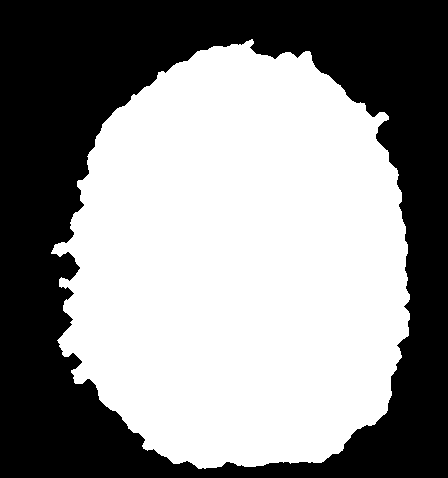
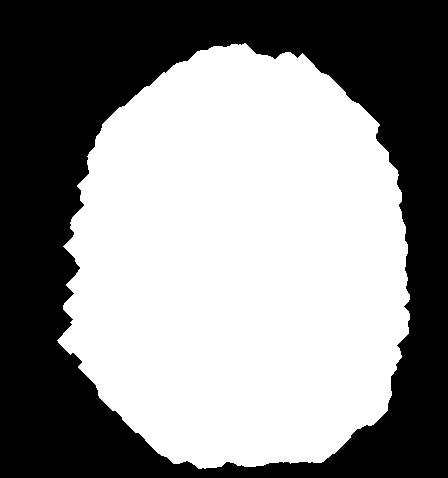
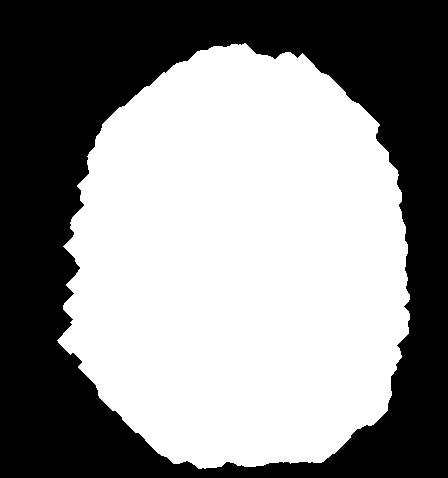

In [5]:
intermediate_results = []
mask = seg.run(fingerprint, intermediate_results)
show(fingerprint, *intermediate_results, mask)

Testing the effect of the various parameters:

In [6]:
@interact(window_size=(3,21,2), percentile=(50, 100), threshold=(0,1,0.01), closing_count=(0,29), opening_count=(0,29) )
def test_parameters(window_size=seg.parameters.window_size, percentile=seg.parameters.percentile, 
                    threshold=seg.parameters.threshold, closing_count=seg.parameters.closing_count, 
                    opening_count=seg.parameters.opening_count):
    seg.parameters = pf.GradMagSegmentationParameters(window_size, percentile, threshold, closing_count, opening_count)
    intermediate_results = []
    mask = seg.run(fingerprint, intermediate_results)
    show(fingerprint, *intermediate_results, cv.merge((fingerprint, mask, fingerprint)), max_per_row=5)

interactive(children=(IntSlider(value=11, description='window_size', max=21, min=3, step=2), IntSlider(value=9…

## 2. Comparison with the groud truth

Comparing a segmentation result with the corresponding ground truth mask loaded from file.

,,,
,,,

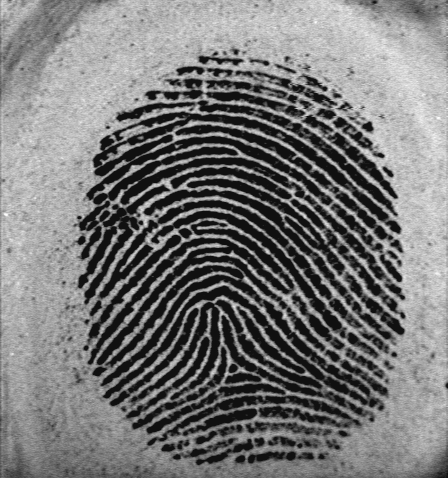
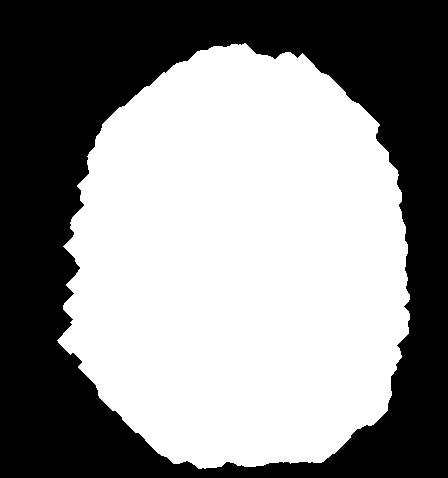
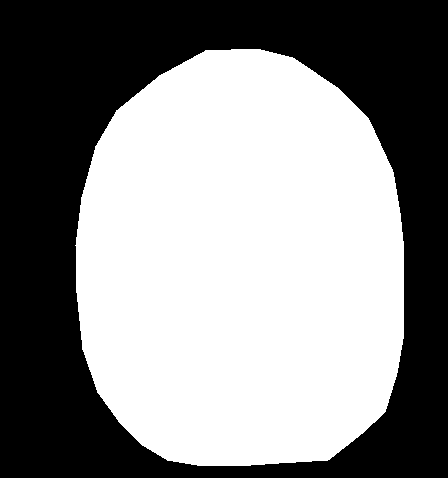
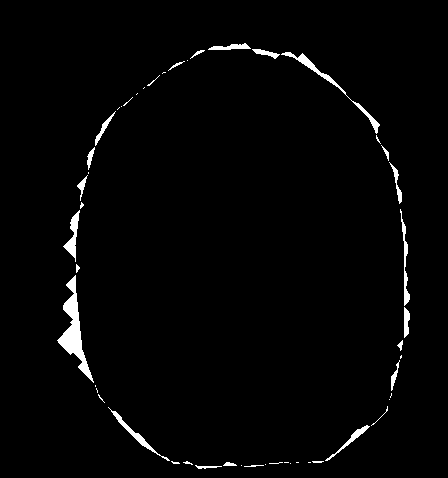

In [8]:
gt_mask = cv.bitwise_not(cv.imread(PATH_GT + 'fvc2000_db3_im_101_1seg.png', cv.IMREAD_GRAYSCALE))
show(fingerprint, mask, gt_mask, cv.bitwise_xor(mask, gt_mask))

For each fingerprint, the error is defined as the percentage of misclassified pixels with respect to the corresponding ground truth:

In [9]:
e = pf.segmentation.compute_segmentation_error(mask, gt_mask)
print(f'Segmentation error of the previous example = {e:.2f}%')

Segmentation error of the previous example = 1.95%
